# RealEstiMate

# 1. Importing packages

In [1]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import geopandas as gpd # geo data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error # evaluation metric
from sklearn.model_selection import cross_val_score

import folium
from folium.plugins import HeatMap
from unidecode import unidecode
from branca.colormap import linear

sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

# 2. Import dataset and data wrangling

In [2]:
# Loading the .csv:
df = pd.read_csv('barcelona_sales.csv', index_col = False)

# First 10 observations:
df.head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6912\1668019893.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('barcelona_sales.csv', index_col = False)


,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_DIAGONAL,LONGITUDE,LATITUDE,geometry
0,A11898131848556022319,201803,323000.0,3845.238095,84,4,1,1,1,1,...,4,0,0,1,1.876290,0.354004,1.475264,2.149566,41.380027,c(2.14956619166374
1,A18099432772155664747,201803,217000.0,2583.333333,84,3,2,0,1,1,...,4,0,0,1,2.118595,0.284372,1.194261,2.145689,41.381632,c(2.14568874106743
2,A2003099089407882787,201803,114000.0,1407.407407,81,2,1,0,1,1,...,5,0,1,0,4.127099,0.261574,2.504982,2.173891,41.423929,c(2.17389124058542
3,A1010373782315301134,201803,378000.0,4784.810127,79,2,1,0,1,0,...,3,0,0,1,2.238113,0.158527,0.795605,2.143379,41.384923,c(2.14337871391529
4,A12978912200216838006,201803,434000.0,3909.909910,111,4,2,1,1,1,...,2,0,0,1,2.333066,0.101568,1.200265,2.143230,41.381076,c(2.14323019628654
5,A10446606541222668172,201803,298000.0,3204.301075,93,2,2,1,1,1,...,3,0,0,1,1.967243,0.150535,0.738334,2.146500,41.386295,c(2.14649968525014
6,A18346635821534899934,201803,228000.0,3931.034483,58,3,1,1,1,0,...,4,0,0,1,1.942047,0.312578,1.405308,2.148517,41.380362,c(2.1485169054037
7,A4447810556012248308,201803,888000.0,5842.105263,152,4,2,1,1,0,...,3,0,0,1,1.062267,0.377037,1.061279,2.157388,41.385968,c(2.15738815958399
8,A7871597847739838783,201803,291000.0,3637.500000,80,3,2,0,1,0,...,3,0,1,0,1.671885,0.064120,0.554998,2.150226,41.389126,c(2.15022632019791
9,A2742411997661424963,201803,786000.0,5240.000000,150,3,2,0,1,0,...,3,0,0,1,0.798845,0.194565,1.292247,2.160958,41.384710,c(2.16095832239192


In [3]:
# Overview of our variables:
df.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_DIAGONAL',
       'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

In [4]:
# Checking for duplicates:
df['ASSETID'].duplicated().value_counts()

# Elliminating duplicates:
df = df.drop_duplicates(subset='ASSETID').reset_index(drop=True)

In [5]:
# Elliminating unnecessary variables:
df = df.drop(columns=[
    'CONSTRUCTIONYEAR',
    'PERIOD',
    'FLOORCLEAN',
    'CADMAXBUILDINGFLOOR',
    'CADDWELLINGCOUNT', 
    'CADASTRALQUALITYID', 
    'BUILTTYPEID_1', 
    'BUILTTYPEID_2', 
    'BUILTTYPEID_3', 
    'FLATLOCATIONID', 
    'ISPARKINGSPACEINCLUDEDINPRICE',
    'PARKINGSPACEPRICE',
    'AMENITYID',
    'ISDUPLEX', 
    'ISSTUDIO', 
    'ISINTOPFLOOR',
    'geometry'])

# Ordering the columns so that UNITPRICE is the second column:
df = df.reindex(columns=[
    'ASSETID', 
    'UNITPRICE',
    'PRICE', 
    'CONSTRUCTEDAREA', 
    'ROOMNUMBER', 
    'BATHNUMBER', 
    'HASTERRACE', 
    'HASLIFT', 
    'HASAIRCONDITIONING',
    'HASPARKINGSPACE', 
    'HASNORTHORIENTATION', 
    'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 
    'HASWESTORIENTATION', 
    'HASBOXROOM', 
    'HASWARDROBE',
    'HASSWIMMINGPOOL', 
    'HASDOORMAN', 
    'HASGARDEN', 
    'CADCONSTRUCTIONYEAR',
    'DISTANCE_TO_CITY_CENTER', 
    'DISTANCE_TO_METRO', 
    'DISTANCE_TO_DIAGONAL',
    'LONGITUDE', 
    'LATITUDE'])

In [6]:
# Checking NaNs:
df.isna().sum()

ASSETID                    0
UNITPRICE                  0
PRICE                      0
CONSTRUCTEDAREA            0
ROOMNUMBER                 0
BATHNUMBER                 0
HASTERRACE                 0
HASLIFT                    0
HASAIRCONDITIONING         0
HASPARKINGSPACE            0
HASNORTHORIENTATION        0
HASSOUTHORIENTATION        0
HASEASTORIENTATION         0
HASWESTORIENTATION         0
HASBOXROOM                 0
HASWARDROBE                0
HASSWIMMINGPOOL            0
HASDOORMAN                 0
HASGARDEN                  0
CADCONSTRUCTIONYEAR        0
DISTANCE_TO_CITY_CENTER    0
DISTANCE_TO_METRO          0
DISTANCE_TO_DIAGONAL       0
LONGITUDE                  0
LATITUDE                   0
dtype: int64

## Adding the location name

In [7]:
# Creating variable 'geometry'(coordinate points) merging LONGITUDE and LATITUDE:
geo_df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

# Loading 'bcn_poly.csv'., which includes the perimeter of each area (neighbourhood) in Bcn:
df_polygons = gpd.read_file('bcn_poly.csv')

# Through a merge, we assign the categorical variable LOCATIONNAME (area) to the table of assets:
geo_df = geo_df.sjoin(df_polygons,how='inner')

# Elliminating leftover columns:
geo_df = geo_df.drop(columns=[
    'LOCATIONID',
    'index_right',
    'ZONELEVELID'])

# 3. EDA

In [8]:
# Definition of Scatter Plot function where UNITPRICE is fixed to check relationships:
def scatter_plot(df, x_var):
    sns.scatterplot(x=x_var, y=geo_df['UNITPRICE'], data=geo_df)
    plt.show()


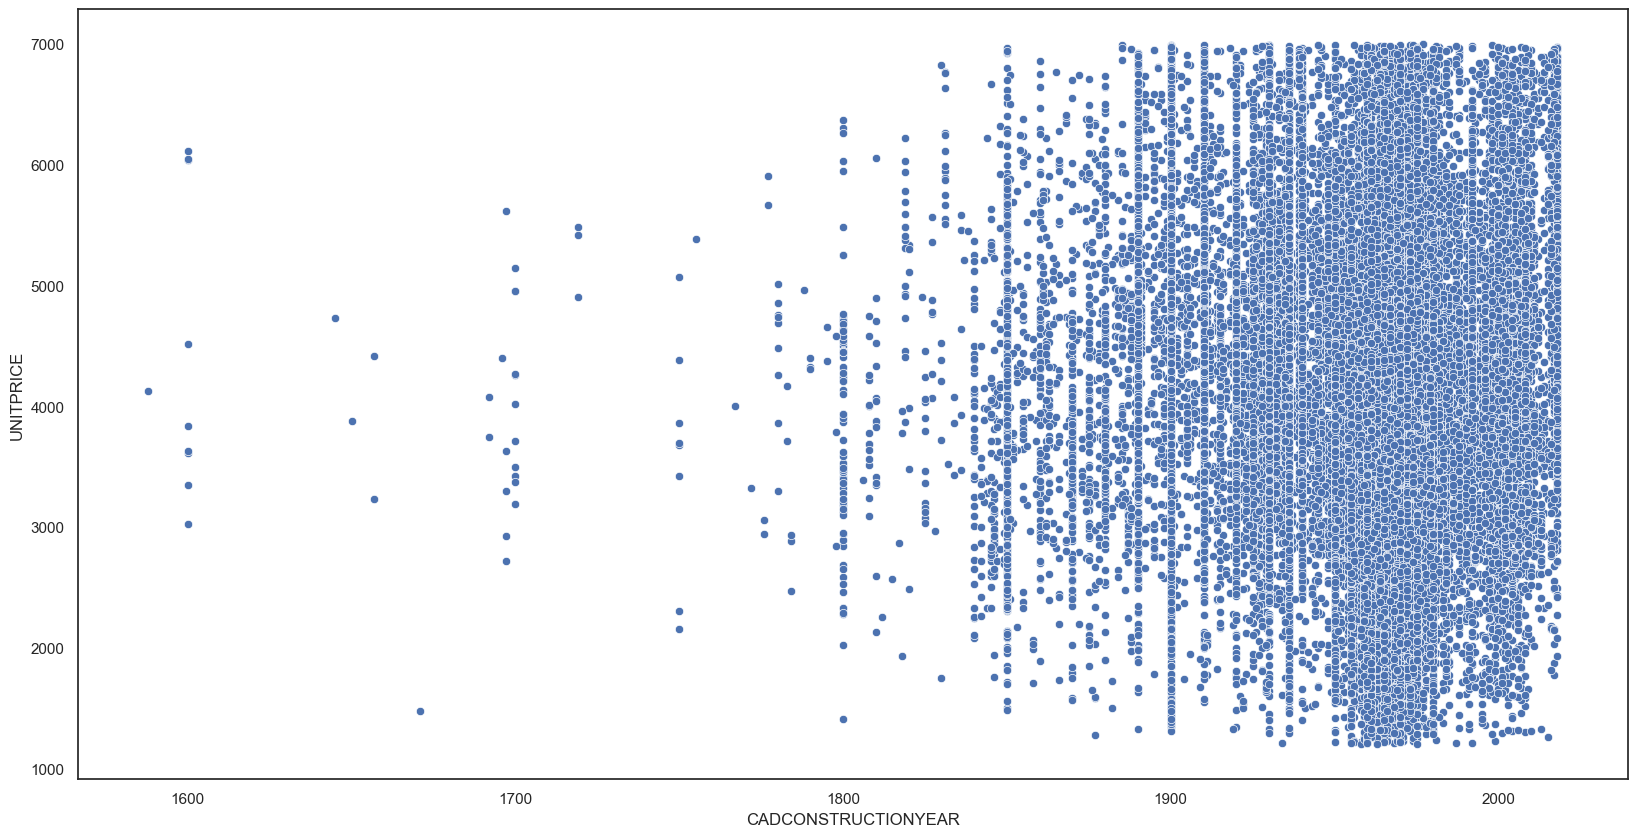

In [53]:
scatter_plot(geo_df,geo_df['CADCONSTRUCTIONYEAR'])

In [58]:
geo_df['UNITPRICE'].describe()



count    46624.000000
mean      4044.688728
std       1188.089783
min       1203.703704
25%       3214.285714
50%       3985.610766
75%       4833.333333
max       6996.688742
Name: UNITPRICE, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6912\1956002741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(geo_df['UNITPRICE'], color='r')


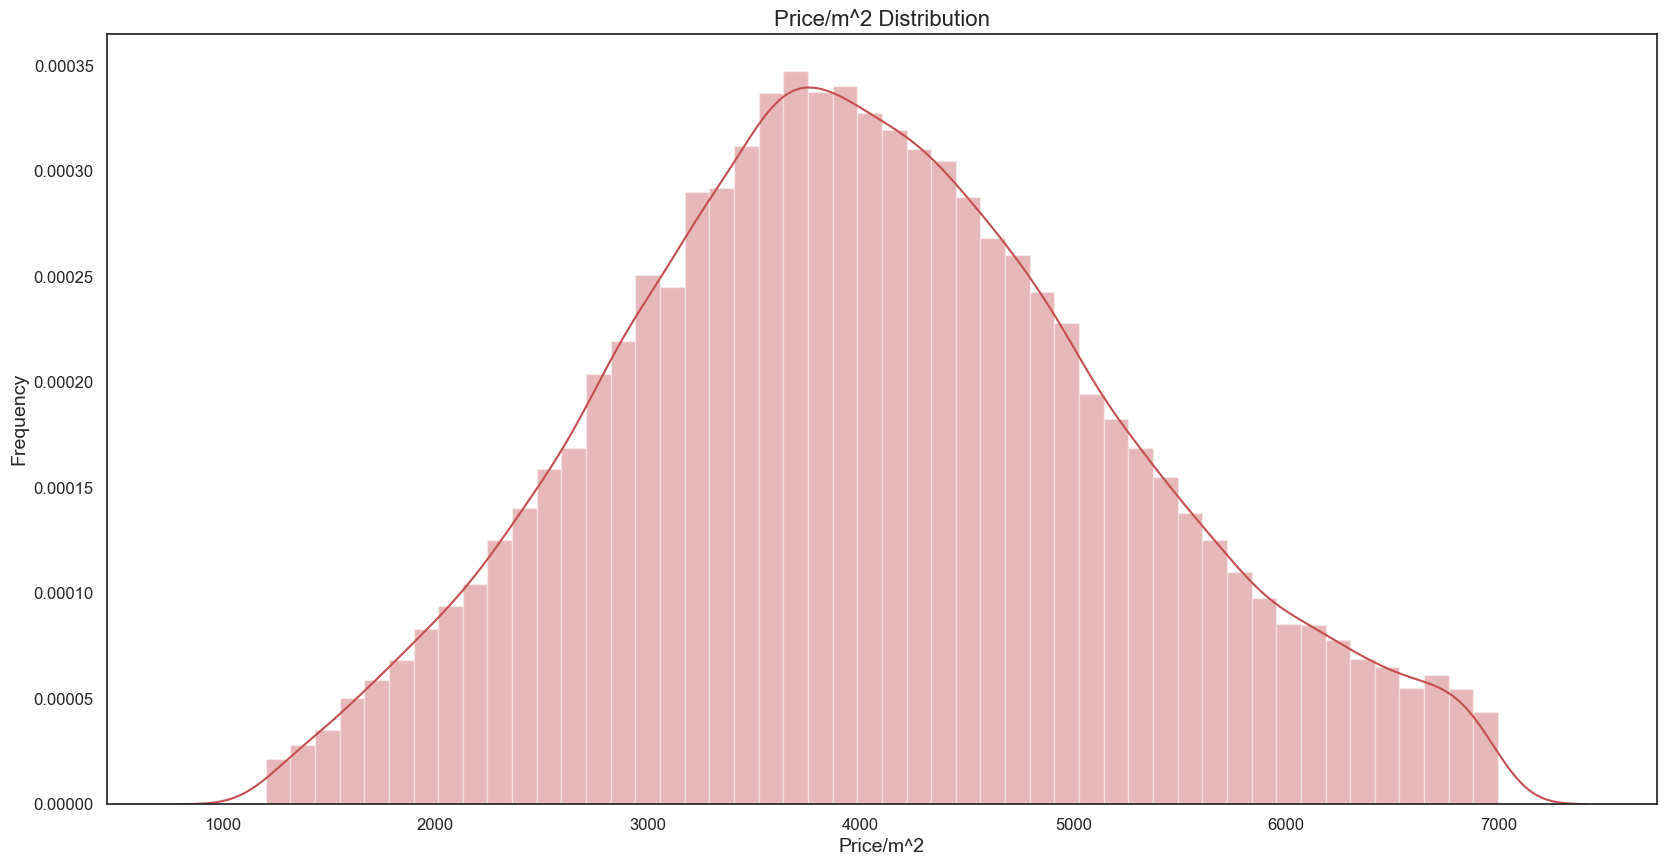

In [60]:
# Distribution plot:
sns.distplot(geo_df['UNITPRICE'], color='r')

plt.title('Price/m^2 Distribution', fontsize=16)
plt.xlabel('Price/m^2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save plot as a file
plt.savefig('distplot.png')

plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6912\2244652525.py:3: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = geo_df.corr()


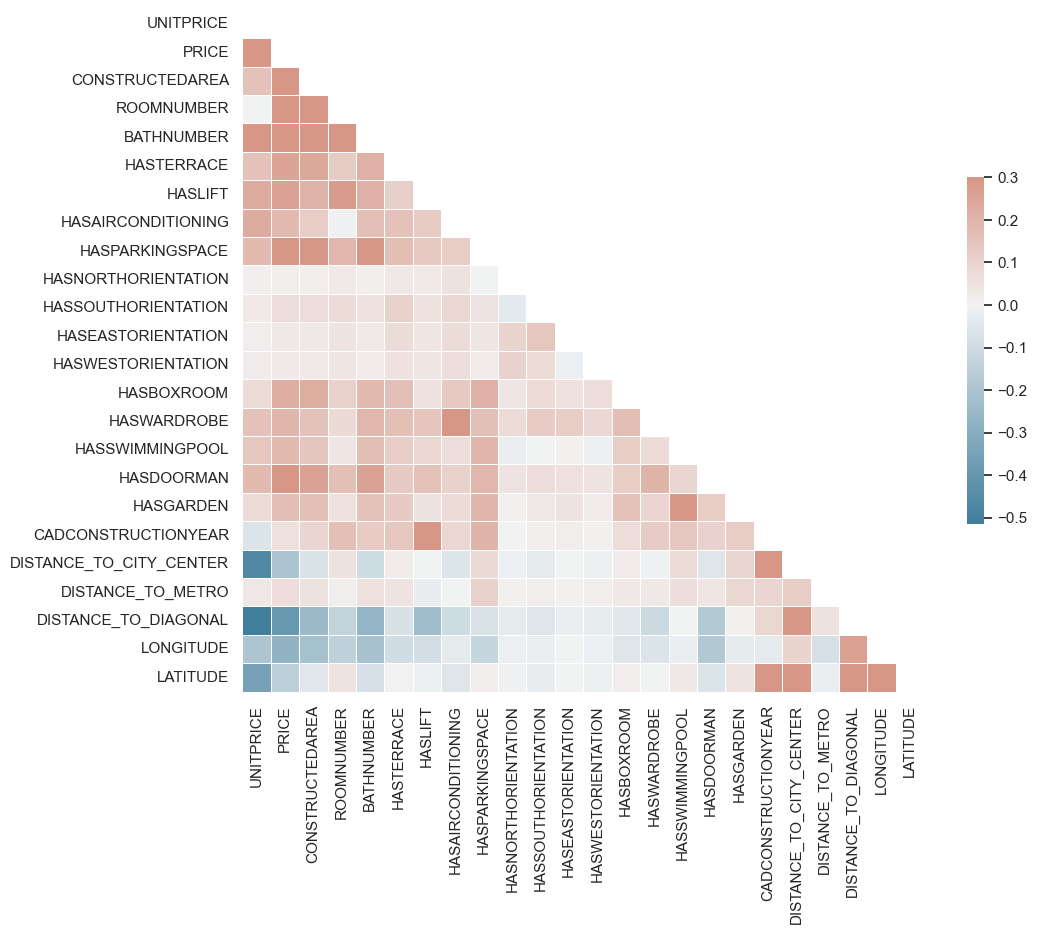

In [62]:
# CORRELATION MATRIX

df_corr = geo_df.corr()

# generate mask for the upper triangle
mask = np.triu(np.ones_like(df_corr,dtype=bool))

# set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# custom diverging map
cmap = sns.diverging_palette(230,20, as_cmap=True)

# heatmap with mask and aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig('correlation_matrix.png')


In [63]:
df_corr

,UNITPRICE,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,HASNORTHORIENTATION,...,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,CADCONSTRUCTIONYEAR,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_DIAGONAL,LONGITUDE,LATITUDE
UNITPRICE,1.000000,0.539068,0.152601,-0.005293,0.300874,0.156125,0.229337,0.231996,0.179816,0.009005,...,0.157446,0.135928,0.183478,0.075575,-0.064323,-0.462281,0.033830,-0.514873,-0.199000,-0.354620
PRICE,0.539068,1.000000,0.876599,0.488631,0.716221,0.254702,0.258383,0.184300,0.358188,0.010447,...,0.194637,0.183596,0.305494,0.169786,0.057472,-0.205881,0.065211,-0.389904,-0.273673,-0.151474
CONSTRUCTEDAREA,0.152601,0.876599,1.000000,0.575146,0.695442,0.239914,0.204924,0.118360,0.316396,0.009020,...,0.158391,0.142994,0.257037,0.163617,0.092110,-0.069799,0.049750,-0.244438,-0.217481,-0.044153
ROOMNUMBER,-0.005293,0.488631,0.575146,1.000000,0.514845,0.118647,0.275979,-0.007759,0.191119,0.025059,...,0.078534,0.039543,0.165541,0.057241,0.164959,0.050941,0.012707,-0.139125,-0.147672,0.044523
BATHNUMBER,0.300874,0.716221,0.695442,0.514845,1.000000,0.216834,0.214324,0.164931,0.319916,0.007318,...,0.189811,0.166336,0.258331,0.153854,0.124991,-0.101879,0.055655,-0.266588,-0.212698,-0.076106
HASTERRACE,0.156125,0.254702,0.239914,0.118647,0.216834,1.000000,0.111077,0.155106,0.169069,0.027971,...,0.164505,0.116424,0.128864,0.128865,0.138365,0.018639,0.044873,-0.075061,-0.088459,0.003872
HASLIFT,0.229337,0.258383,0.204924,0.275979,0.214324,0.111077,1.000000,0.123757,0.134017,0.025681,...,0.145588,0.083945,0.159075,0.049425,0.325299,-0.002891,-0.023364,-0.236800,-0.088020,-0.011431
HASAIRCONDITIONING,0.231996,0.184300,0.118360,-0.007759,0.164931,0.155106,0.123757,1.000000,0.117955,0.050931,...,0.295616,0.065419,0.103712,0.076041,0.086701,-0.056880,-0.003662,-0.101413,-0.035459,-0.048994
HASPARKINGSPACE,0.179816,0.358188,0.316396,0.191119,0.319916,0.169069,0.134017,0.117955,1.000000,0.000517,...,0.160192,0.198829,0.190708,0.200340,0.201906,0.077376,0.106924,-0.070667,-0.122141,0.015355
HASNORTHORIENTATION,0.009005,0.010447,0.009020,0.025059,0.007318,0.027971,0.025681,0.050931,0.000517,1.000000,...,0.074895,-0.021451,0.043424,0.004012,-0.001577,-0.013096,0.004345,-0.034821,-0.014097,-0.007815


## New variables for more insightful graphs

In [12]:
# NEW VARIABLES

# Mean Total Price:
mean_price_per_loc = geo_df.groupby(by='LOCATIONNAME').agg({'PRICE': 'mean'}).round(2)
mean_price_per_loc = mean_price_per_loc.rename(columns={'PRICE': 'MEAN_PRICE'})

# Mean Price/m2:
mean_uprice_per_loc = geo_df.groupby(by='LOCATIONNAME').agg({'UNITPRICE': 'mean'}).round(2)
mean_uprice_per_loc = mean_uprice_per_loc.rename(columns={'UNITPRICE': 'MEAN_UNITPRICE'})

# Mean m2 per area:
mean_m2_per_loc = geo_df.groupby(by='LOCATIONNAME').agg({'CONSTRUCTEDAREA': 'mean'}).round(2)
mean_m2_per_loc = mean_m2_per_loc.rename(columns={'CONSTRUCTEDAREA':'MEAN_CONSTRUCTEDAREA'})

# Mean Year of construction per area:
mean_year_per_loc = geo_df.groupby(by='LOCATIONNAME').agg({'CADCONSTRUCTIONYEAR': 'mean'}).round(0).astype(int)
mean_year_per_loc = mean_year_per_loc.rename(columns={'CADCONSTRUCTIONYEAR':'MEAN_CADCONSTRUCTIONYEAR'})

# Merging previous 4 variables into new table:
merged_gdf = pd.merge(pd.merge(pd.merge(pd.merge(geo_df, mean_price_per_loc, on='LOCATIONNAME'), mean_uprice_per_loc, on='LOCATIONNAME'), mean_m2_per_loc, on='LOCATIONNAME'), mean_year_per_loc, on='LOCATIONNAME')

# New variable; Decade of Construction for each asset:
for decade in range(1500, 2024, 10):
    merged_gdf.loc[merged_gdf['CADCONSTRUCTIONYEAR'].between(decade, decade+9), 'DECADE'] = decade

# Convert MEAN_CADCONSTRUCTIONYEAR into non-decimal years:
merged_gdf['MEAN_CADCONSTRUCTIONYEAR']= pd.to_datetime(merged_gdf['MEAN_CADCONSTRUCTIONYEAR'], format= '%Y')
merged_gdf['MEAN_CADCONSTRUCTIONYEAR'] = merged_gdf['MEAN_CADCONSTRUCTIONYEAR'].dt.year

# New variable; Median of Decade of Construction for each area:
for decade in range(1500, 2024, 10):
    merged_gdf.loc[merged_gdf['MEAN_CADCONSTRUCTIONYEAR'].between(decade, decade+9), 'MEAN_DECADE'] = decade

# Convert DECADE and MEAN_DECADE into non-decimal years:
merged_gdf['DECADE'] = merged_gdf['DECADE'].round(0).astype(int)
merged_gdf['MEAN_DECADE'] = merged_gdf['MEAN_DECADE'].round(0).astype(int)

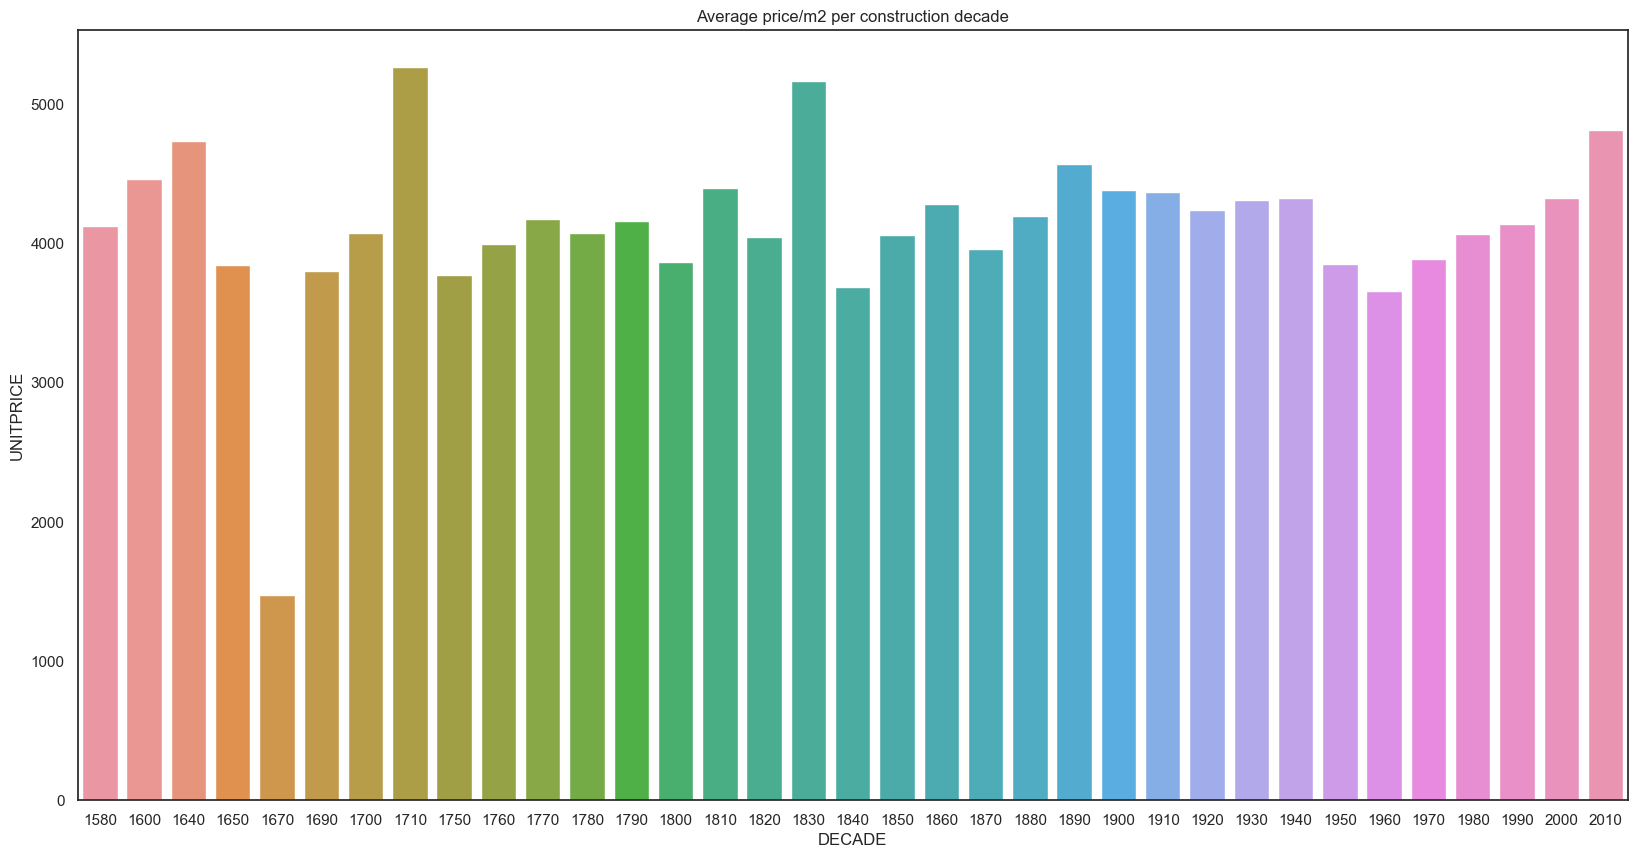

In [13]:
# Mean UNITPRICE per DECADE
bcn_means = merged_gdf.groupby('DECADE')['UNITPRICE'].mean().reset_index()

# Bar chart:
sns.barplot(x='DECADE', y='UNITPRICE', data=bcn_means, order=bcn_means['DECADE'])
plt.title('Average price/m2 per construction decade')
plt.show()

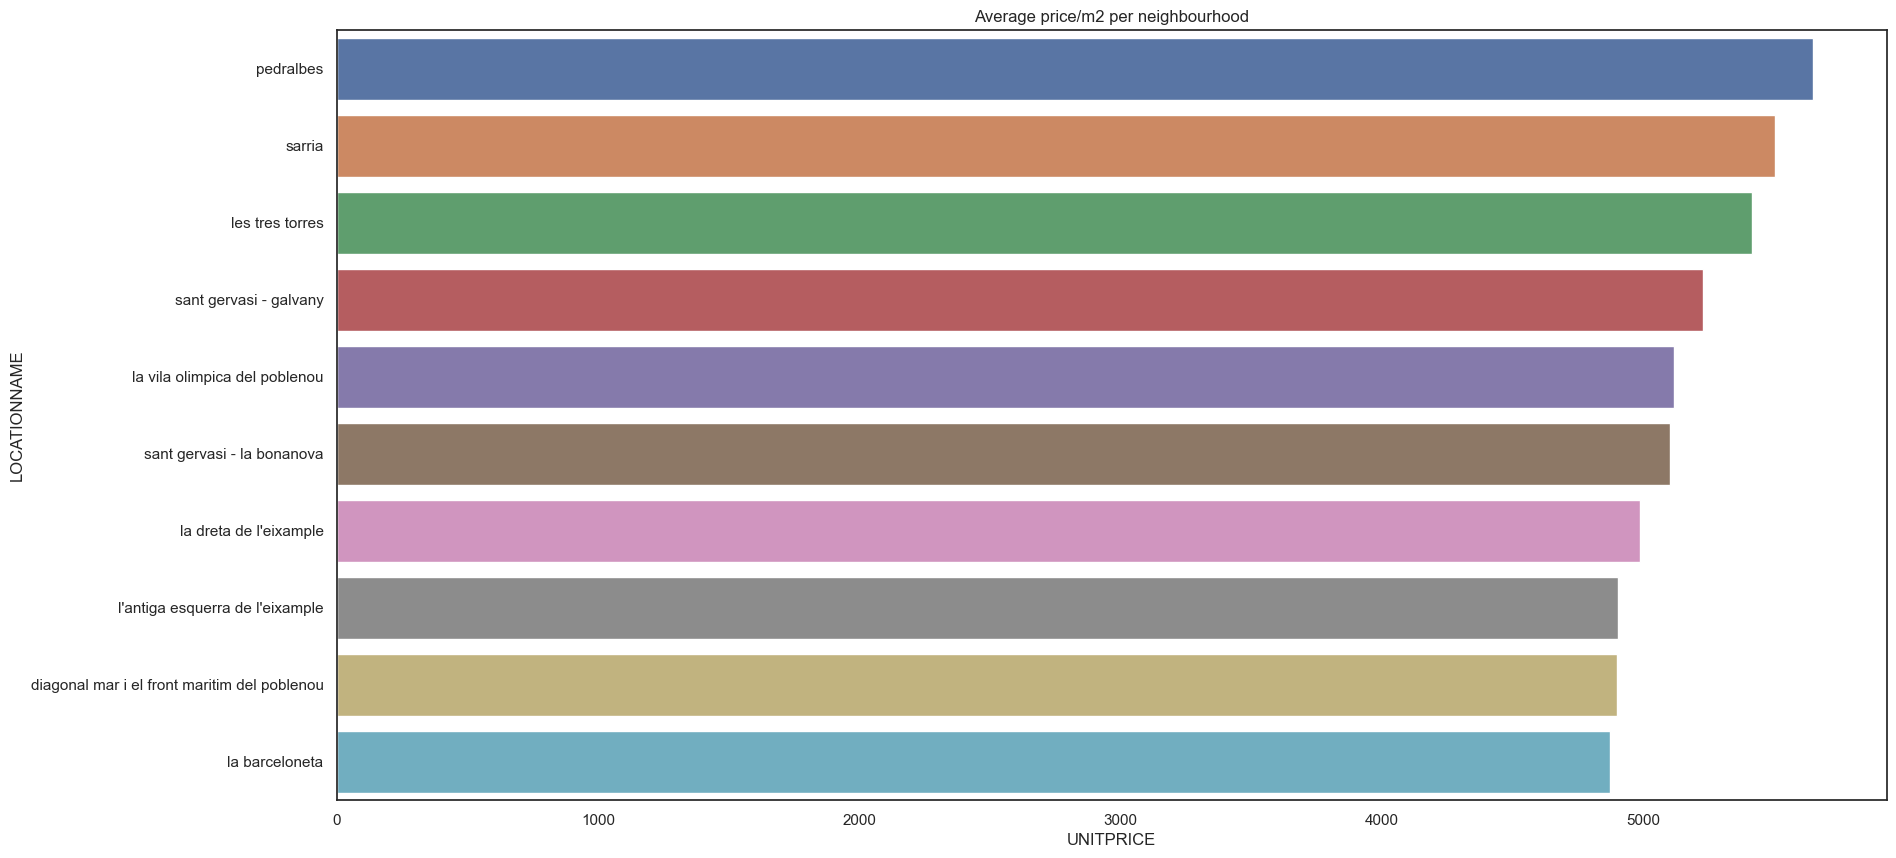

In [74]:
# Mean UNITPRICE per LOCATIONNAME:
bcn_means_loc = merged_gdf.groupby('LOCATIONNAME')['UNITPRICE'].mean().reset_index()
bcn_means_loc = bcn_means_loc.sort_values('UNITPRICE', ascending=False).head(10)

# Bar chart:
sns.barplot(x='UNITPRICE', y='LOCATIONNAME', data= bcn_means_loc, order= bcn_means_loc['LOCATIONNAME'])
plt.title('Average price/m2 per neighbourhood')
plt.show()


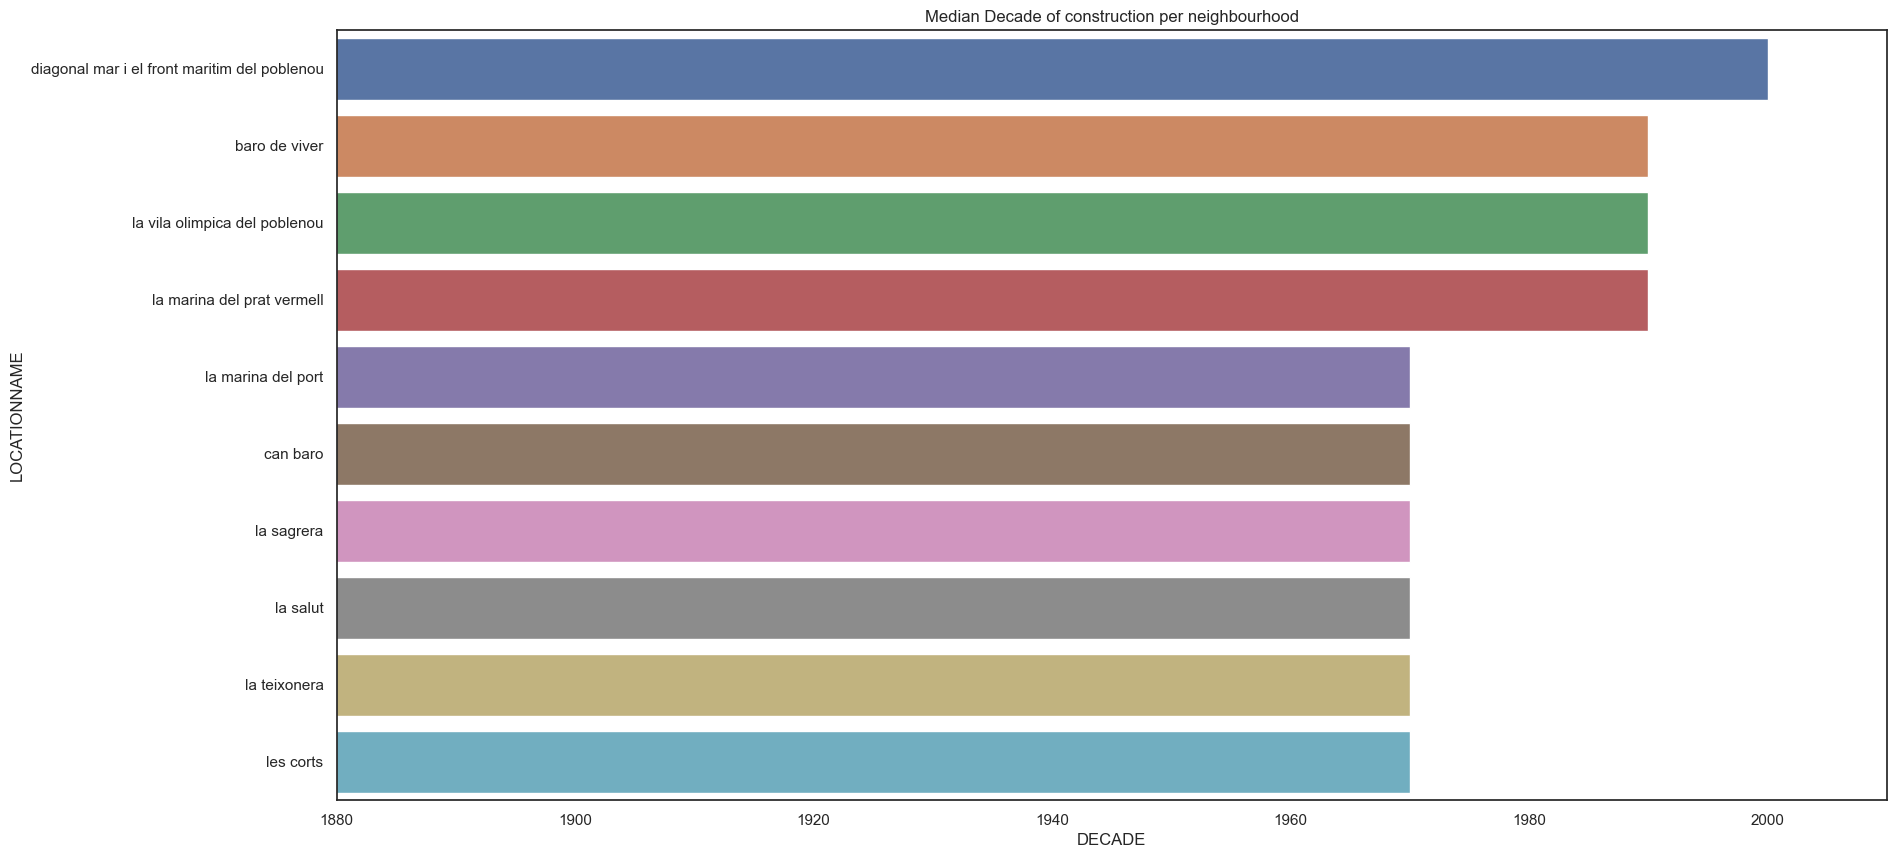

In [65]:
# Newest Areas:
bcn_means_year = merged_gdf.groupby('LOCATIONNAME')['DECADE'].median().reset_index()
bcn_means_year = bcn_means_year.sort_values('DECADE', ascending=False).head(10)

# Bar chart:
sns.barplot(x='DECADE', y='LOCATIONNAME', data= bcn_means_year, order= bcn_means_year['LOCATIONNAME'])
plt.title('Median Decade of construction per neighbourhood')
plt.xlim(1880, 2010)
plt.show()


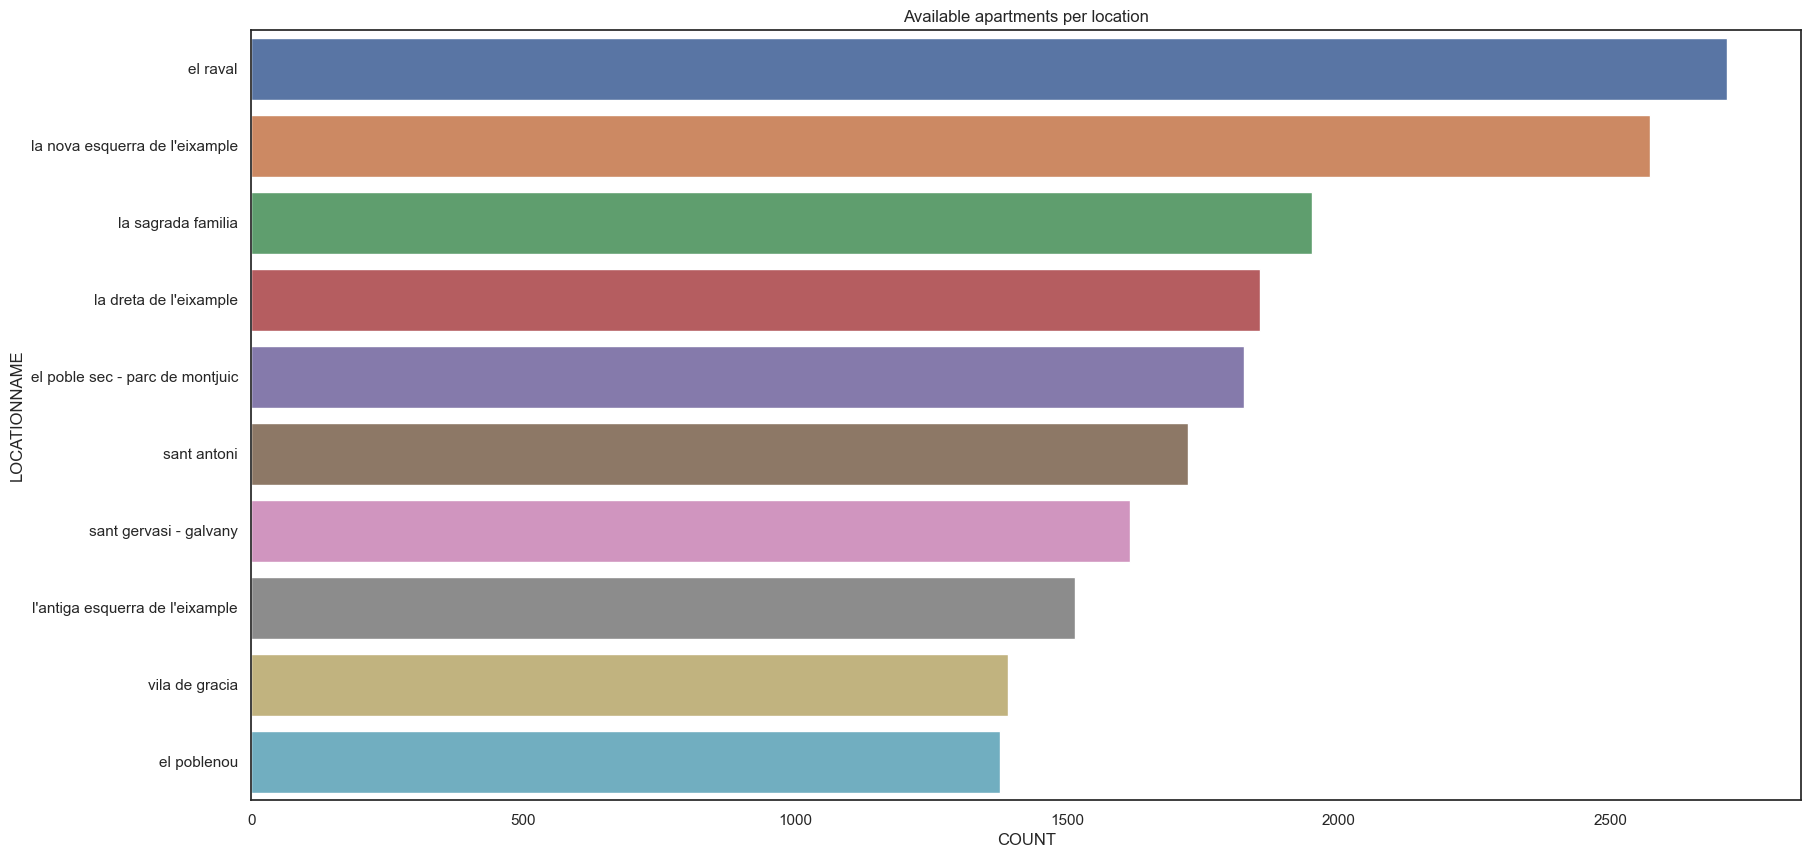

In [72]:
# top 10 available locations:
counts = merged_gdf['LOCATIONNAME'].value_counts()
df_counts = pd.DataFrame({'LOCATIONNAME': counts.index, 'COUNT': counts.values})
df_counts_10 = df_counts.head(10) # defined separately to use the previous df_counts in the folium map
sns.barplot(x='COUNT', y='LOCATIONNAME', data=df_counts_10)
plt.title('Available apartments per location')
plt.show()


In [17]:
merged_gdf.head(5)

,ASSETID,UNITPRICE,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,...,LATITUDE,geometry,LOCATIONNAME,WKT,MEAN_PRICE,MEAN_UNITPRICE,MEAN_CONSTRUCTEDAREA,MEAN_CADCONSTRUCTIONYEAR,DECADE,MEAN_DECADE
0,A11898131848556022319,3845.238095,323000.0,84,4,1,1,1,1,0,...,41.380027,POINT (2.14957 41.38003),la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",426618.83,4563.64,94.85,1958,1970,1950
1,A18099432772155664747,2583.333333,217000.0,84,3,2,0,1,1,0,...,41.381632,POINT (2.14569 41.38163),la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",426618.83,4563.64,94.85,1958,1930,1950
2,A1010373782315301134,4784.810127,378000.0,79,2,1,0,1,0,0,...,41.384923,POINT (2.14338 41.38492),la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",426618.83,4563.64,94.85,1958,2010,1950
3,A12978912200216838006,3909.909910,434000.0,111,4,2,1,1,1,0,...,41.381076,POINT (2.14323 41.38108),la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",426618.83,4563.64,94.85,1958,1970,1950
4,A10446606541222668172,3204.301075,298000.0,93,2,2,1,1,1,0,...,41.386295,POINT (2.14650 41.38630),la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",426618.83,4563.64,94.85,1958,1990,1950


In [18]:
# NEW COLUMNS FOR THE FOLIUM MAP

# GEODF for each map. It's messy :)
merged_df2 = merged_gdf.set_index('LOCATIONNAME')

# df for map 1 - Price/m2
df_polygons2 = pd.merge(df_polygons, mean_uprice_per_loc, on='LOCATIONNAME', how='left' )

# df for map 2 - constructed area
df_polygons3 = pd.merge(df_polygons, mean_m2_per_loc, on='LOCATIONNAME', how='left' )

# df for map 3 - supply of apartments
df_polygons4 = pd.merge(df_polygons,df_counts,on='LOCATIONNAME', how='left')

Map 1 - Price/m2

In [19]:
# GeoJSON object:
df_polygons2 = df_polygons2.set_crs(epsg=4326)
bcn_geojson = df_polygons2.to_crs(epsg='4326').to_json()

# colormap object to assign a different colour to each location:
colormap = linear.YlOrRd_09.scale(
    df_polygons2['MEAN_UNITPRICE'].min(),
    df_polygons2['MEAN_UNITPRICE'].max())

bcn_map = folium.Map(location=[41.385063, 2.173404], zoom_start=10)

# adding GeoJSON to the map:
folium.GeoJson(
    bcn_geojson,
    name='AVERAGE €/M^2 PER LOCATION',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['MEAN_UNITPRICE']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.8,
    },
    tooltip=folium.GeoJsonTooltip(fields=['LOCATIONNAME', 'MEAN_UNITPRICE'], aliases=['Location', '€/m^2'])
).add_to(bcn_map)


# legend:
folium.LayerControl().add_to(bcn_map)
colormap.caption = 'AVERAGE €/M^2 PER LOCATION'
colormap.add_to(bcn_map)

bcn_map

In [20]:
bcn_map.save('bcn_map_pricem2.html')

Map 2 - Constructed area

In [21]:
# GeoJSON object:
df_polygons3 = df_polygons3.set_crs(epsg=4326)
bcn_geojson2 = df_polygons3.to_crs(epsg='4326').to_json()

# colormap object to assign a different colour to each location:
colormap = linear.YlOrRd_09.scale(
    df_polygons3['MEAN_CONSTRUCTEDAREA'].min(),
    df_polygons3['MEAN_CONSTRUCTEDAREA'].max())

bcn_map2 = folium.Map(location=[41.385063, 2.173404], zoom_start=10)

# adding GeoJSON to the map:
folium.GeoJson(
    bcn_geojson2,
    name='AVERAGE CONSTRUCTED M^2 PER NEIGHBOURHOOD',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['MEAN_CONSTRUCTEDAREA']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.8,
    },
    tooltip=folium.GeoJsonTooltip(fields=['LOCATIONNAME', 'MEAN_CONSTRUCTEDAREA'], aliases=['Location', 'm^2'])
).add_to(bcn_map2)


# legend:
folium.LayerControl().add_to(bcn_map2)
colormap.caption = 'AVERAGE CONSTRUCTED M^2 PER NEIGHBOURHOOD'
colormap.add_to(bcn_map2)

bcn_map2

In [22]:
bcn_map2.save('bcn_map_m2.html')

Map 3 - Supply of apartments


In [23]:
# GeoJSON object:
df_polygons4 = df_polygons4.set_crs(epsg=4326)
bcn_geojson3 = df_polygons4.to_crs(epsg='4326').to_json()

# colormap object to assign a different colour to each location:
colormap = linear.YlOrRd_09.scale(
    df_polygons4['COUNT'].min(),
    df_polygons4['COUNT'].max())

bcn_map3 = folium.Map(location=[41.385063, 2.173404], zoom_start=10)

# adding GeoJSON to the map:
folium.GeoJson(
    bcn_geojson3,
    name='SUPPLY AVAILABLE PER NEIGHBOURHOOD',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['COUNT']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.8,
    },
    tooltip=folium.GeoJsonTooltip(fields=['LOCATIONNAME', 'COUNT'], aliases=['Location', 'Supply'])
).add_to(bcn_map3)


# legend:
folium.LayerControl().add_to(bcn_map3)
colormap.caption = 'SUPPLY AVAILABLE PER NEIGHBOURHOOD'
colormap.add_to(bcn_map3)

bcn_map3

In [24]:
bcn_map3.save('bcn_map_supply.html')

# 4. Feature Selection & Data Split

In [25]:
# Dropping columns for future simplicity, given that we want as few variables as possible for future Streamlit website:
geo_df_sin_coordenadas = geo_df.drop(columns=['ASSETID','LONGITUDE', 'LATITUDE', 'geometry','WKT'])

# Function to replace spaces and apostrophes:
def replace_caracters(text):
    return text.replace("'", "").replace(" ", "_").replace("-","_")

# Applying the function:
geo_df_sin_coordenadas["LOCATIONNAME"] = geo_df_sin_coordenadas["LOCATIONNAME"].apply(replace_caracters)

In [26]:
# Creating dummies for each area, based on LOCATIONNAME:
locationname_dummies = pd.get_dummies(geo_df_sin_coordenadas['LOCATIONNAME'], prefix=None)

# Concat with the dummy variables:
geo_df_model = pd.concat([geo_df_sin_coordenadas,locationname_dummies], axis=1).drop(columns=['LOCATIONNAME'])

# 5. Modeling


In [27]:
# Feature selection and data split:
X_var = geo_df_model[['PRICE','CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
       'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'CADCONSTRUCTIONYEAR',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_DIAGONAL','baro_de_viver', 'can_baro', 'can_peguera___el_turo_de_la_peira',
       'canyelles', 'ciutat_meridiana___torre_baro___vallbona',
       'diagonal_mar_i_el_front_maritim_del_poblenou', 'el_baix_guinardo',
       'el_besos', 'el_bon_pastor', 'el_camp_de_larpa_del_clot',
       'el_camp_den_grassot_i_gracia_nova', 'el_carmel', 'el_clot', 'el_coll',
       'el_congres_i_els_indians', 'el_fort_pienc', 'el_gotic', 'el_guinardo',
       'el_parc_i_la_llacuna_del_poblenou', 'el_poble_sec___parc_de_montjuic',
       'el_poblenou', 'el_putxet_i_el_farro', 'el_raval', 'horta',
       'hostafrancs', 'la_barceloneta', 'la_bordeta', 'la_dreta_de_leixample',
       'la_font_de_la_guatlla', 'la_font_den_fargues', 'la_guineueta',
       'la_marina_del_port', 'la_marina_del_prat_vermell',
       'la_maternitat_i_sant_ramon', 'la_nova_esquerra_de_leixample',
       'la_prosperitat', 'la_sagrada_familia', 'la_sagrera', 'la_salut',
       'la_teixonera', 'la_trinitat_nova', 'la_trinitat_vella',
       'la_vall_dhebron___la_clota', 'la_verneda_i_la_pau',
       'la_vila_olimpica_del_poblenou', 'lantiga_esquerra_de_leixample',
       'les_corts', 'les_roquetes', 'les_tres_torres', 'navas', 'pedralbes',
       'porta', 'provencals_del_poblenou', 'sant_andreu', 'sant_antoni',
       'sant_genis_dels_agudells___montbau', 'sant_gervasi___galvany',
       'sant_gervasi___la_bonanova', 'sant_marti_de_provencals',
       'sant_pere___santa_caterina_i_la_ribera', 'sants', 'sants___badal',
       'sarria', 'vallcarca_i_els_penitents',
       'vallvidrera___el_tibidabo_i_les_planes', 'verdun', 'vila_de_gracia',
       'vilapicina_i_la_torre_llobeta', 'zona_franca___port'
       ]]

y_var = geo_df_model['UNITPRICE']

In [28]:
# Visualizing splits:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state= 0 )
print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :            PRICE  CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  \
252    281000.0               80           3           1           0        1   
45148  240000.0               40           3           1           0        1   
41684  985000.0              200           4           3           1        1   
29973  142000.0               34           2           1           0        0   
22951  141000.0               46           2           1           0        0   

       HASAIRCONDITIONING  HASPARKINGSPACE  HASNORTHORIENTATION  \
252                     1                0                    0   
45148                   1                0                    0   
41684                   1                0                    0   
29973                   0                0                    0   
22951                   0                0                    0   

       HASSOUTHORIENTATION  ...  sant_pere___santa_caterina_i_la_ribera  \
252             

In [29]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.184e+08, tolerance: 5.269e+06
  model = cd_fast.enet_coordinate_descent(


# 6. EVALUATION

In [30]:
# OLS EVALUATION METRICS:

ols_evs = explained_variance_score(y_test, ols_yhat)
ols_r2 = r2_score(y_test, ols_yhat)
ols_mse = mean_squared_error(y_test, ols_yhat)
ols_mae = mean_absolute_error(y_test, ols_yhat)

print(cl('OLS EVALUATION METRICS:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {:.2f}'.format(ols_evs), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {:.2f}'.format(ols_r2), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Squared Error of OLS model is {:.2f}'.format(ols_mse), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Absolute Error of OLS model is {:.2f}'.format(ols_mae), attrs=['bold']))
print('-------------------------------------------------------------------------------')

OLS EVALUATION METRICS:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.82
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.82
-------------------------------------------------------------------------------
Mean Squared Error of OLS model is 251029.25
-------------------------------------------------------------------------------
Mean Absolute Error of OLS model is 344.16
-------------------------------------------------------------------------------


In [31]:
# RIDGE EVALUATION METRICS:

ridge_evs = explained_variance_score(y_test, ridge_yhat)
ridge_r2 = r2_score(y_test, ridge_yhat)
ridge_mse = mean_squared_error(y_test, ridge_yhat)
ridge_mae = mean_absolute_error(y_test, ridge_yhat)

print(cl('RIDGE EVALUATION METRICS:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of RIDGE model is {:.2f}'.format(ridge_evs), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of RIDGE model is {:.2f}'.format(ridge_r2), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Squared Error of RIDGE model is {:.2f}'.format(ridge_mse), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Absolute Error of RIDGE model is {:.2f}'.format(ridge_mae), attrs=['bold']))
print('-------------------------------------------------------------------------------')

RIDGE EVALUATION METRICS:
-------------------------------------------------------------------------------
Explained Variance Score of RIDGE model is 0.82
-------------------------------------------------------------------------------
R-Squared of RIDGE model is 0.82
-------------------------------------------------------------------------------
Mean Squared Error of RIDGE model is 251028.29
-------------------------------------------------------------------------------
Mean Absolute Error of RIDGE model is 344.15
-------------------------------------------------------------------------------


In [32]:
# LASSO EVALUATION METRICS:

lasso_evs = explained_variance_score(y_test, lasso_yhat)
lasso_r2 = r2_score(y_test, lasso_yhat)
lasso_mse = mean_squared_error(y_test, lasso_yhat)
lasso_mae = mean_absolute_error(y_test, lasso_yhat)

print(cl('LASSO EVALUATION METRICS:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of LASSO model is {:.2f}'.format(lasso_evs), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of LASSO model is {:.2f}'.format(lasso_r2), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Squared Error of LASSO model is {:.2f}'.format(lasso_mse), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Absolute Error of LASSO model is {:.2f}'.format(lasso_mae), attrs=['bold']))
print('-------------------------------------------------------------------------------')


LASSO EVALUATION METRICS:
-------------------------------------------------------------------------------
Explained Variance Score of LASSO model is 0.82
-------------------------------------------------------------------------------
R-Squared of LASSO model is 0.82
-------------------------------------------------------------------------------
Mean Squared Error of LASSO model is 251037.84
-------------------------------------------------------------------------------
Mean Absolute Error of LASSO model is 344.14
-------------------------------------------------------------------------------


In [33]:
# BAYESIAN EVALUATION METRICS:

bayesian_evs = explained_variance_score(y_test, bayesian_yhat)
bayesian_r2 = r2_score(y_test, bayesian_yhat)
bayesian_mse = mean_squared_error(y_test, bayesian_yhat)
bayesian_mae = mean_absolute_error(y_test, bayesian_yhat)

print(cl('BAYESIAN EVALUATION METRICS:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of BAYESIAN model is {:.2f}'.format(bayesian_evs), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of BAYESIAN model is {:.2f}'.format(bayesian_r2), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Squared Error of BAYESIAN model is {:.2f}'.format(bayesian_mse), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Absolute Error of BAYESIAN model is {:.2f}'.format(bayesian_mae), attrs=['bold']))
print('-------------------------------------------------------------------------------')


BAYESIAN EVALUATION METRICS:
-------------------------------------------------------------------------------
Explained Variance Score of BAYESIAN model is 0.82
-------------------------------------------------------------------------------
R-Squared of BAYESIAN model is 0.82
-------------------------------------------------------------------------------
Mean Squared Error of BAYESIAN model is 251086.73
-------------------------------------------------------------------------------
Mean Absolute Error of BAYESIAN model is 344.12
-------------------------------------------------------------------------------


In [34]:
# ELASTIC NET EVALUATION METRICS:

en_evs = explained_variance_score(y_test, en_yhat)
en_r2 = r2_score(y_test, en_yhat)
en_mse = mean_squared_error(y_test, en_yhat)
en_mae = mean_absolute_error(y_test, en_yhat)

print(cl('ELASTIC NET EVALUATION METRICS:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ELASTIC NET model is {:.2f}'.format(en_evs), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ELASTIC NET model is {:.2f}'.format(en_r2), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Squared Error of ELASTIC NET model is {:.2f}'.format(en_mse), attrs=['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Mean Absolute Error of ELASTIC NET model is {:.2f}'.format(en_mae), attrs=['bold']))
print('-------------------------------------------------------------------------------')


ELASTIC NET EVALUATION METRICS:
-------------------------------------------------------------------------------
Explained Variance Score of ELASTIC NET model is 0.82
-------------------------------------------------------------------------------
R-Squared of ELASTIC NET model is 0.82
-------------------------------------------------------------------------------
Mean Squared Error of ELASTIC NET model is 254944.79
-------------------------------------------------------------------------------
Mean Absolute Error of ELASTIC NET model is 345.51
-------------------------------------------------------------------------------


In [35]:
# CROSS-VALIDATION TO EVALUATE OVERFITTING:

# 5-fold cross-validation:
scores = cross_val_score(lasso, X_train, y_train, cv=5)

# printing scores for the mean and the standard deviation:
print("Cross-validated R^2:", scores.mean())
print("Standard deviation:", scores.std())

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.765e+09, tolerance: 4.201e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+07, tolerance: 4.213e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

Cross-validated R^2: 0.8207489882441024
Standard deviation: 0.010597096939564583


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.501e+09, tolerance: 4.229e+06
  model = cd_fast.enet_coordinate_descent(


In [66]:
# Coefficients of the model
coeficients = lasso.coef_

# Finding those coef equal to 0:
for i, coeficient in enumerate(coeficients):
    if coeficient == 0:
        print(f"Coeficient for variable {i} is equal to zero")

name_variable = X_train.columns

# Variables whose coef is equal to 0:
for i, coeficient in enumerate(coeficients):
    if coeficient == 0:
        print(f"Coeficient for variable {name_variable[i]} is equal to 0")


Coeficient for variable 30 is equal to zero
Coeficient for variable 63 is equal to zero
Coeficient for variable el_camp_de_larpa_del_clot is equal to 0
Coeficient for variable la_vall_dhebron___la_clota is equal to 0


In [ ]:
# SCATTER PLOT
sns.scatterplot(x=y_test, y=lasso_yhat)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot Lasso')
plt.show()


In [ ]:
# HISTOGRAM
sns.histplot(data=pd.DataFrame({'Real Values': y_test, 'Predicted Values': lasso_yhat}),
             bins=20, kde=True)
plt.xlim(0)
plt.title('Histogram Lasso')
plt.show()

In [37]:
import pickle

In [38]:
# To avoid errors with pickle i need to define the variables as lists:
# First i create a DF with the explanatory variables:
geo_df_model_X = geo_df_model.drop(columns=['UNITPRICE'])

# Loop to define the lists in a dictionary:
column_lists = {}

# Iterating over the columns:
for col in geo_df_model_X.columns:
    # Empty list with the same name as the column:
    column_lists[col] = []
    # Append each value in the column to the list with the same name:
    for value in geo_df_model_X[col]:
        column_lists[col].append(value)

In [39]:
# Iterate over the keys of the dictionary and assign the corresponding list
for key in column_lists:
    exec(f"{key} = column_lists['{key}']")


In [40]:
data = {'model': lasso, 'PRICE': PRICE, 'CONSTRUCTEDAREA': CONSTRUCTEDAREA,
    'ROOMNUMBER': ROOMNUMBER, 'BATHNUMBER': BATHNUMBER, 'HASTERRACE': HASTERRACE,
    'HASLIFT': HASLIFT, 'HASAIRCONDITIONING': HASAIRCONDITIONING, 'HASPARKINGSPACE': HASPARKINGSPACE,
    'HASNORTHORIENTATION': HASNORTHORIENTATION, 'HASSOUTHORIENTATION': HASSOUTHORIENTATION,
    'HASEASTORIENTATION': HASEASTORIENTATION, 'HASWESTORIENTATION': HASWESTORIENTATION,
    'HASBOXROOM': HASBOXROOM, 'HASWARDROBE': HASWARDROBE, 'HASSWIMMINGPOOL': HASSWIMMINGPOOL,
    'HASDOORMAN': HASDOORMAN, 'HASGARDEN': HASGARDEN, 'CADCONSTRUCTIONYEAR': CADCONSTRUCTIONYEAR,
    'DISTANCE_TO_CITY_CENTER': DISTANCE_TO_CITY_CENTER, 'DISTANCE_TO_METRO': DISTANCE_TO_METRO,
    'DISTANCE_TO_DIAGONAL': DISTANCE_TO_DIAGONAL, 'baro_de_viver': baro_de_viver, 'can_baro': can_baro,
    'can_peguera___el_turo_de_la_peira': can_peguera___el_turo_de_la_peira,
    'canyelles': canyelles, 'ciutat_meridiana___torre_baro___vallbona': ciutat_meridiana___torre_baro___vallbona,
    'diagonal_mar_i_el_front_maritim_del_poblenou': diagonal_mar_i_el_front_maritim_del_poblenou,
    'el_baix_guinardo': el_baix_guinardo, 'el_besos': el_besos, 'el_bon_pastor': el_bon_pastor,
    'el_camp_de_larpa_del_clot': el_camp_de_larpa_del_clot, 'el_camp_den_grassot_i_gracia_nova': el_camp_den_grassot_i_gracia_nova,
    'el_carmel': el_carmel, 'el_clot': el_clot, 'el_coll': el_coll, 'el_congres_i_els_indians': el_congres_i_els_indians,
    'el_fort_pienc': el_fort_pienc, 'el_gotic': el_gotic, 'el_guinardo': el_guinardo,
    'el_parc_i_la_llacuna_del_poblenou': el_parc_i_la_llacuna_del_poblenou, 
    'el_poble_sec___parc_de_montjuic': el_poble_sec___parc_de_montjuic, 'el_poblenou': el_poblenou,
    'el_putxet_i_el_farro': el_putxet_i_el_farro, 'el_raval': el_raval, 'horta': horta, 'hostafrancs': hostafrancs,
    'la_barceloneta': la_barceloneta, 'la_bordeta': la_bordeta, 'la_dreta_de_leixample': la_dreta_de_leixample,
    'la_font_de_la_guatlla': la_font_de_la_guatlla, 'la_font_den_fargues': la_font_den_fargues,
    'la_guineueta': la_guineueta, 'la_marina_del_port': la_marina_del_port, 'la_marina_del_prat_vermell': la_marina_del_prat_vermell,
    'la_maternitat_i_sant_ramon': la_maternitat_i_sant_ramon, 'la_nova_esquerra_de_leixample': la_nova_esquerra_de_leixample,
    'la_prosperitat': la_prosperitat, 'la_sagrada_familia': la_sagrada_familia, 'la_sagrera': la_sagrera,
    'la_salut': la_salut, 'la_teixonera': la_teixonera, 'la_trinitat_nova': la_trinitat_nova, 'la_trinitat_vella': la_trinitat_vella,
    'la_vall_dhebron___la_clota': la_vall_dhebron___la_clota, 'la_verneda_i_la_pau': la_verneda_i_la_pau,
    'la_vila_olimpica_del_poblenou': la_vila_olimpica_del_poblenou, 'lantiga_esquerra_de_leixample': lantiga_esquerra_de_leixample,
    'les_corts': les_corts, 'les_roquetes': les_roquetes, 'les_tres_torres': les_tres_torres, 'navas': navas, 
    'pedralbes': pedralbes, 'porta': porta, 'provencals_del_poblenou': provencals_del_poblenou,  
    'sant_andreu': sant_andreu, 'sant_antoni': sant_antoni, 'sant_genis_dels_agudells___montbau': sant_genis_dels_agudells___montbau,
    'sant_gervasi___galvany': sant_gervasi___galvany, 'sant_gervasi___la_bonanova': sant_gervasi___la_bonanova,
    'sant_marti_de_provencals': sant_marti_de_provencals, 'sant_pere___santa_caterina_i_la_ribera': sant_pere___santa_caterina_i_la_ribera,
    'sants': sants, 'sants___badal': sants___badal, 'sarria': sarria, 'vallcarca_i_els_penitents': vallcarca_i_els_penitents,
    'vallvidrera___el_tibidabo_i_les_planes': vallvidrera___el_tibidabo_i_les_planes, 'verdun': verdun,
    'vila_de_gracia': vila_de_gracia, 'vilapicina_i_la_torre_llobeta': vilapicina_i_la_torre_llobeta,
    'zona_franca___port':zona_franca___port}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [41]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

# creating a list for each column in 'data':
lasso_loaded = data['model']

columns = ['PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE',
       'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'CADCONSTRUCTIONYEAR',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_DIAGONAL',
       'baro_de_viver', 'can_baro', 'can_peguera___el_turo_de_la_peira',
       'canyelles', 'ciutat_meridiana___torre_baro___vallbona',
       'diagonal_mar_i_el_front_maritim_del_poblenou', 'el_baix_guinardo',
       'el_besos', 'el_bon_pastor', 'el_camp_de_larpa_del_clot',
       'el_camp_den_grassot_i_gracia_nova', 'el_carmel', 'el_clot', 'el_coll',
       'el_congres_i_els_indians', 'el_fort_pienc', 'el_gotic', 'el_guinardo',
       'el_parc_i_la_llacuna_del_poblenou', 'el_poble_sec___parc_de_montjuic',
       'el_poblenou', 'el_putxet_i_el_farro', 'el_raval', 'horta',
       'hostafrancs', 'la_barceloneta', 'la_bordeta', 'la_dreta_de_leixample',
       'la_font_de_la_guatlla', 'la_font_den_fargues', 'la_guineueta',
       'la_marina_del_port', 'la_marina_del_prat_vermell',
       'la_maternitat_i_sant_ramon', 'la_nova_esquerra_de_leixample',
       'la_prosperitat', 'la_sagrada_familia', 'la_sagrera', 'la_salut',
       'la_teixonera', 'la_trinitat_nova', 'la_trinitat_vella',
       'la_vall_dhebron___la_clota', 'la_verneda_i_la_pau',
       'la_vila_olimpica_del_poblenou', 'lantiga_esquerra_de_leixample',
       'les_corts', 'les_roquetes', 'les_tres_torres', 'navas', 'pedralbes',
       'porta', 'provencals_del_poblenou', 'sant_andreu', 'sant_antoni',
       'sant_genis_dels_agudells___montbau', 'sant_gervasi___galvany',
       'sant_gervasi___la_bonanova', 'sant_marti_de_provencals',
       'sant_pere___santa_caterina_i_la_ribera', 'sants', 'sants___badal',
       'sarria', 'vallcarca_i_els_penitents',
       'vallvidrera___el_tibidabo_i_les_planes', 'verdun', 'vila_de_gracia',
       'vilapicina_i_la_torre_llobeta', 'zona_franca___port']

for column in columns:
    exec(f"{column} = data['{column}']")
